# Assignment 9 - Data Visualization 2

##### Kaustubh Shrikant Kabra
##### ERP Number :- 38
##### TE Comp 1

- Use the inbuild dataset 'titanic'. Plot a box plot for distribution of age with respect to each gender along with the information about wheather they survived or not.
- Write observations on the inference form the above statistics.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**VARIABLE DESCRIPTIONS**
- Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- survival Survival (0 = No; 1 = Yes)
- name Name
- sex Sex
- age Age
- sibsp Number of Siblings/Spouses Aboard
- parch Number of Parents/Children Aboard
- ticket Ticket Number
- fare Passenger Fare (British pound)
- cabin Cabin
- embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
data.shape

(891, 12)

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

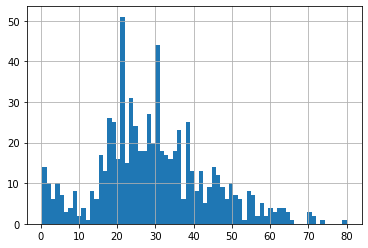

In [5]:
###Now let us look at the ages of the passengers

data['Age'].hist(bins=70)

There are more number of people from age group 15-35 years old.

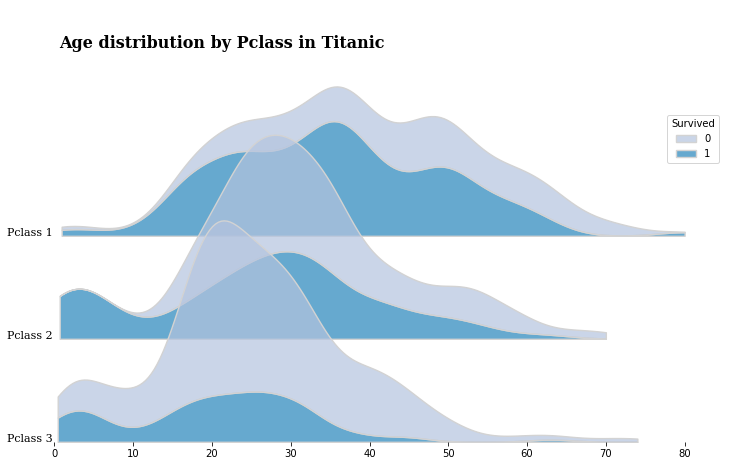

In [6]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()
colors = ["#022133", "#5c693b", "#51371c"]

for idx, cls, c in zip(range(3), sorted(data['Pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))
    
    # you can also draw density plot with matplotlib + scipy.
    sns.kdeplot(x='Age', data=data[data['Pclass']==cls], 
                fill=True, ax=axes[idx], cut=0, bw_method=0.25, 
                lw=1.4, edgecolor='lightgray', hue='Survived', 
                multiple="stack", palette='PuBu', alpha=0.7
               ) 
    
    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 85)
    
    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)
        
    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Pclass {cls}',fontweight="light", fontfamily='serif', fontsize=11,ha="right")
    if idx != 1 : axes[idx].get_legend().remove()
        
fig.text(0.13,0.81,"Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)

plt.show()  

From above graph, we can infer that there are less numbers of survivers form class 2 & 3  and their age group is between 10-30 years

In [7]:
survival_rate = data.groupby(['Sex']).mean()[['Survived']]
male_rate = survival_rate.loc['male']
female_rate = survival_rate.loc['female']
display(survival_rate)

,Survived
Sex,
female,0.742038
male,0.188908


In [8]:
male_pos = np.random.uniform(0, male_rate, len(data[(data['Sex']=='male') & (data['Survived']==1)]))
male_neg = np.random.uniform(male_rate, 1, len(data[(data['Sex']=='male') & (data['Survived']==0)]))
female_pos = np.random.uniform(0, female_rate, len(data[(data['Sex']=='female') & (data['Survived']==1)]))
female_neg = np.random.uniform(female_rate, 1, len(data[(data['Sex']=='female') & (data['Survived']==0)]))

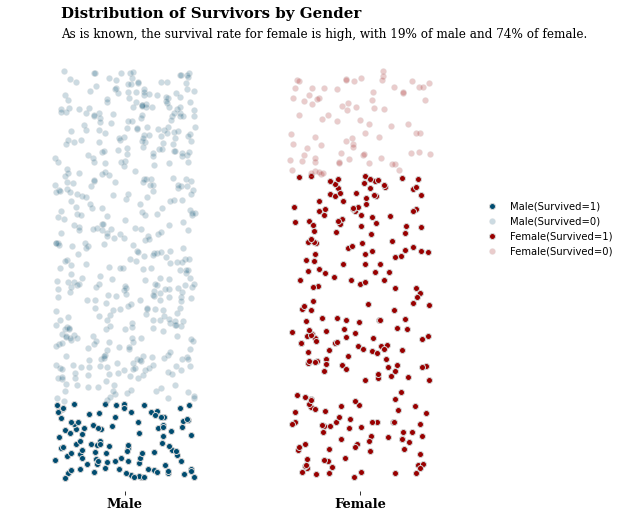

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))

np.random.seed(42)

# Male Stripplot
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='#004c70', edgecolor='lightgray', label='Male(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='#004c70', edgecolor='lightgray', alpha=0.2, label='Male(Survived=0)')

# Female Stripplot
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='#990000', edgecolor='lightgray', label='Female(Survived=1)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='#990000', edgecolor='lightgray', alpha=0.2, label='Female(Survived=0)')

# Set Figure & Axes
ax.set_xlim(-0.5, 2.0)
ax.set_ylim(-0.03, 1.1)

# Ticks
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontweight='bold', fontfamily='serif', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

# Spines
for s in ["top","right","left", 'bottom']:
    ax.spines[s].set_visible(False)


# Title & Explanation
fig.text(0.1, 1, 'Distribution of Survivors by Gender', fontweight='bold', fontfamily='serif', fontsize=15)    
fig.text(0.1, 0.96, 'As is known, the survival rate for female is high, with 19% of male and 74% of female.', fontweight='light', fontfamily='serif', fontsize=12)    

ax.legend(loc=(0.8, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Age wrt Survived')

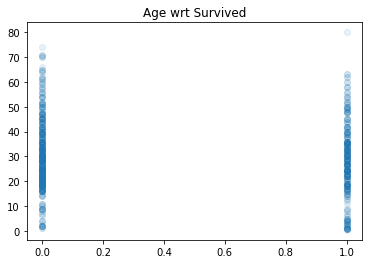

In [10]:
plt.scatter(data.Survived, data.Age, alpha=0.1)   ## here the plot has to be transparent so we need to pic low alpha value
plt.title("Age wrt Survived")

So From the above we can understand that, some of the older people died (between 50-70) and some of the younger people (between 20-40) survived more.

In [13]:
g = sns.FacetGrid(data=df,col="Sex",margin_titles=True)
g.map(sns.boxplot,"Survived","Age",order=[False,True])

NameError: name 'df' is not defined

C:\Users\asus\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


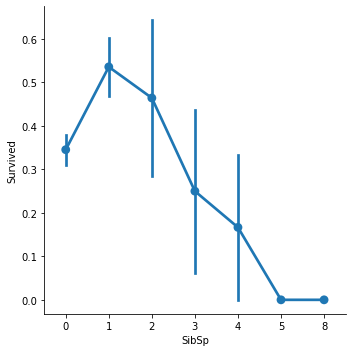

In [14]:
sns.factorplot(x="SibSp", y="Survived", data=data);

More people have survived with family size 2 and less people from family size 5